# Handoffs 

In [1]:
import nest_asyncio
nest_asyncio.apply()

from agents import Agent, Runner

In [5]:
from agents.tool import WebSearchTool
from agents import function_tool

@function_tool
def write_to_file(path: str, content: str):
    with open(path, "w") as f:
        f.write(content)

@function_tool
def read_file(path: str):
    with open(path, "r") as f:
        return f.read()

research_agent = Agent(
    name="ResearchAgent",
    instructions="""
    You are a research assistant.
    You are given a question and you need to find the answer by searching the web.
    """,
    model="gpt-4o-mini",
    tools=[WebSearchTool()],
)

file_management_agent = Agent(
    name="FileManagementAgent",
    instructions="""
    You are a file management assistant.
    You are given a file path and you need to manage the file.
    """,
    model="gpt-4o-mini",
    tools=[read_file, write_to_file],
)

In [7]:
triage_agent = Agent(
    name="TriageAgent",
    instructions="""
    You are a triage assistant.
    You are given a question and you need to determine which agent to handoff the question to.
    The agents you can handoff to are:
    - ResearchAgent (for web search tasks)
    - FileManagementAgent (for file management tasks like write or read)
    """,
    model="gpt-5-mini",
    handoffs=[research_agent, file_management_agent],
)

In [8]:
result = Runner.run_sync(triage_agent, "What are the top AI tools that came out in August 2025?")

print(result.final_output)

In August 2025, several innovative AI tools were introduced across various domains. Here are some of the top releases:



**OpenAI GPT-5**  
Launched on August 7, 2025, GPT-5 is OpenAI's latest multimodal large language model, offering enhanced reasoning, safety, and personalization. It supports a 256K token context window, enabling more coherent long-form interactions. ([tomsguide.com](https://www.tomsguide.com/news/live/openai-chatgpt-5-live-blog?utm_source=openai))




**Microsoft Project Ire**  
Announced in late August 2025, Project Ire is an autonomous AI agent designed to detect and reverse engineer malware. It utilizes large language models and specialized cybersecurity tools to analyze software files, achieving a 90% accuracy rate in early tests. ([itpro.com](https://www.itpro.com/security/malware/microsoft-quietly-launched-an-ai-agent-that-can-reverse-engineer-and-detect-malware?utm_source=openai))




**Google's Nano Banana**  
Integrated into Google's Gemini app, Nano Banan

![](2025-08-27-15-21-38.png)

In [9]:
result = Runner.run_sync(triage_agent, "Research the latest AI tools from august 2025 and \
    write a mini report file named ai_tools_august_2025.md and save it in the current directory.")

print(result.final_output)

As of August 2025, the artificial intelligence (AI) landscape has seen significant advancements across various domains. Below is an overview of notable AI tools and developments:

**1. Language Models**

- **GPT-5 by OpenAI**: Released on August 7, 2025, GPT-5 is a multimodal large language model that integrates reasoning and non-reasoning capabilities. It offers state-of-the-art performance on various benchmarks and is accessible through ChatGPT, Microsoft Copilot, and the OpenAI API. ([en.wikipedia.org](https://en.wikipedia.org/wiki/GPT-5?utm_source=openai))

- **Claude Opus 4.1 by Anthropic**: Launched on August 5, 2025, Claude Opus 4.1 is the latest in Anthropic's series of AI models, offering enhanced capabilities for coding and reasoning tasks. It is available to paid users, including those using GitHub Copilot. ([en.wikipedia.org](https://en.wikipedia.org/wiki/Claude_%28language_model%29?utm_source=openai))

**2. AI Image and Video Generation**

- **Nano Banana by Google**: Inte

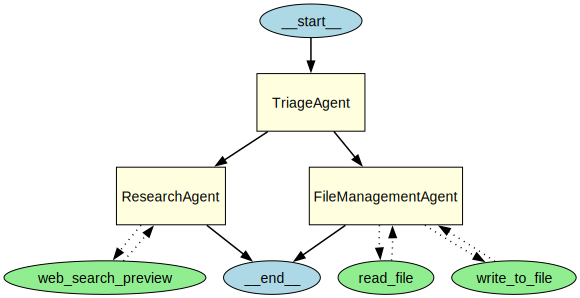

In [10]:
from agents.extensions.visualization import draw_graph

draw_graph(triage_agent)